# Lesson 11 activity solution

**Note**: we're not done yet! These plots fulfill the requirements, but in many cases we can do a lot better!

## Problem statement:
Analyze the housing dataset using various types of plots to gain insights into the data.

Housing sales dataset avalible here: [housing_data.csv](https://gperdrizet.github.io/FSA_devops/assets/data/unit2/housing_data.csv)

## Steps to perform:
1. Create a line plot to visualize the trend of house prices over the years.
2. Use a scatter plot to visualize the relationship between two numerical variables, such as __LotArea__ and __SalePrice__.
3. Create a bar chart to show the count of houses in each __Neighborhood__.
4. Use a box plot to visualize the distribution of __SalePrice__ in each __Neighborhood__.
5. Create a pie chart to visualize the proportion of houses that fall into each __MSZoning__ category.
6. Use a 3D scatter plot to visualize __LotArea__, __OverallQual__, and __SalePrice__ together.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import seaborn as sns

## Load the dataset

In [ ]:
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit2/housing_data.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1. House price trends over time

In [4]:
# Convert sale year to string so we can handle it as a categorical variable
df['YrSold'] = df['YrSold'].astype(str)

### 1.1. Matplotlib line plot

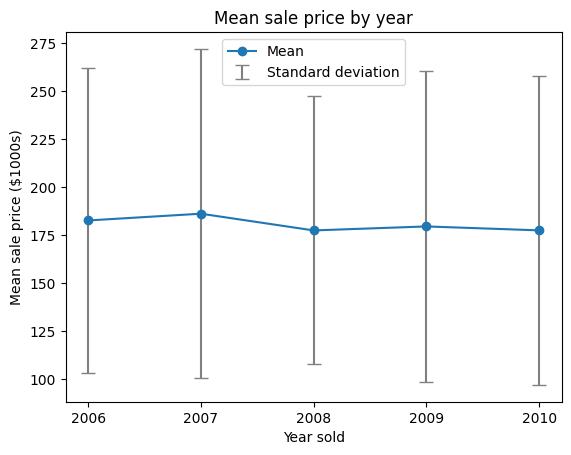

In [5]:
# Group by year and calculate median price
yearly_prices = df.groupby('YrSold')['SalePrice'].mean().sort_index()
yearly_std = df.groupby('YrSold')['SalePrice'].std().sort_index()

# Create line plot
plt.title('Mean sale price by year')
plt.errorbar(
    yearly_prices.index,
    yearly_prices.values,
    yerr=yearly_std.values,
    c='grey',
    linestyle='',
    ecolor='grey',
    capsize=5,
    label='Standard deviation'
)
plt.plot(yearly_prices.index, yearly_prices.values, marker='o', label='Mean')

plt.xlabel('Year sold')
plt.ylabel('Mean sale price ($1000s)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.legend()
plt.show()

### 1.2. Seaborn line plot

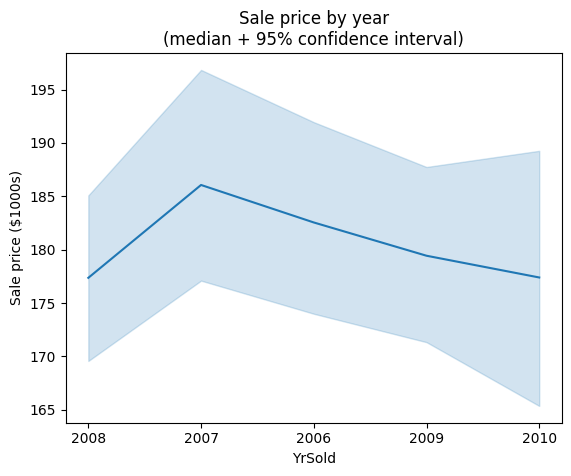

In [6]:
sns.lineplot(data=df, x='YrSold', y='SalePrice')
plt.title('Sale price by year\n(median + 95% confidence interval)')
plt.ylabel('Sale price ($1000s)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.show()

### 1.3. Seaborn boxplot

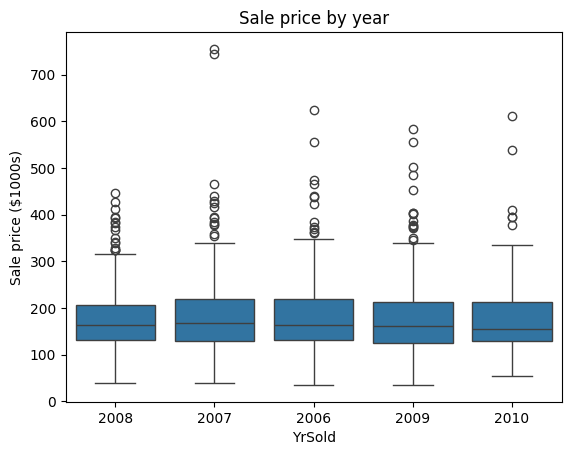

In [7]:
sns.boxplot(data=df, x='YrSold', y='SalePrice')
plt.title('Sale price by year')
plt.ylabel('Sale price ($1000s)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.show()

## 2. LotArea vs SalePrice

### 2.1. Matplotlib scatter plot

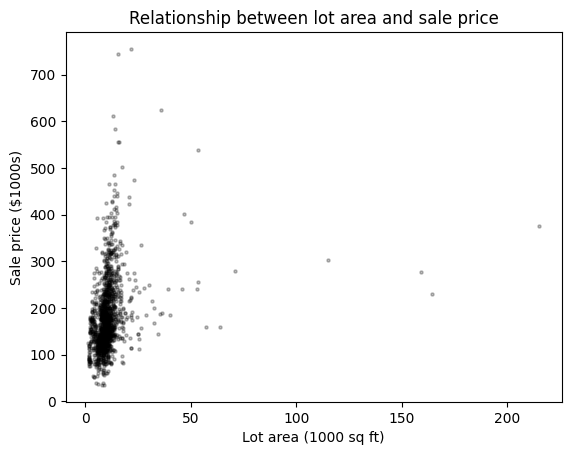

In [8]:
# Create scatter plot
plt.title('Relationship between lot area and sale price')
plt.scatter(df['LotArea'], df['SalePrice'], s=5, alpha=0.25, color='black')
plt.xlabel('Lot area (1000 sq ft)')
plt.ylabel('Sale price ($1000s)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.show()

### 2.2. Matplotlib scaled scatter plot

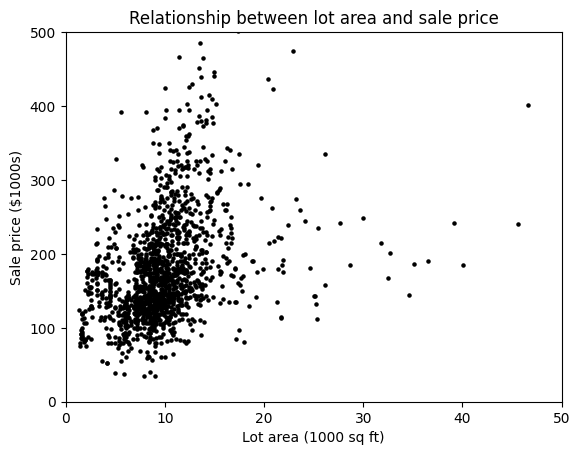

In [9]:
# Create scatter plot
plt.title('Relationship between lot area and sale price')
plt.scatter(df['LotArea'], df['SalePrice'], s=5, color='black')
plt.xlabel('Lot area (1000 sq ft)')
plt.ylabel('Sale price ($1000s)')
plt.xlim(0, 50000)
plt.ylim(0, 500000)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.show()

### 2.3. Matplotlib log-log scatter plot

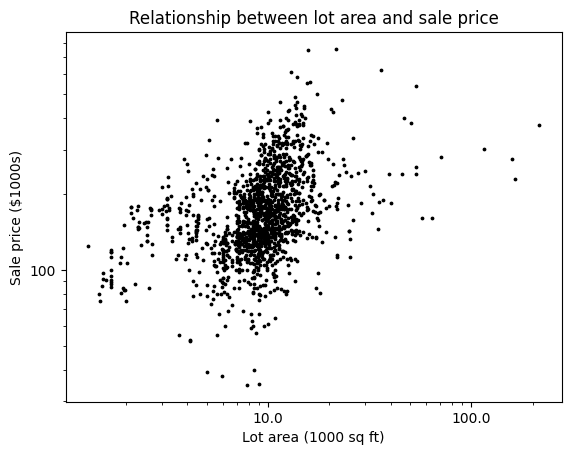

In [10]:
# Create scatter plot
plt.title('Relationship between lot area and sale price')
plt.scatter(df['LotArea'], df['SalePrice'], s=3, color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lot area (1000 sq ft)')
plt.ylabel('Sale price ($1000s)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.1f}'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.show()

### 2.4. Seaborn scatter plot with marginal histograms

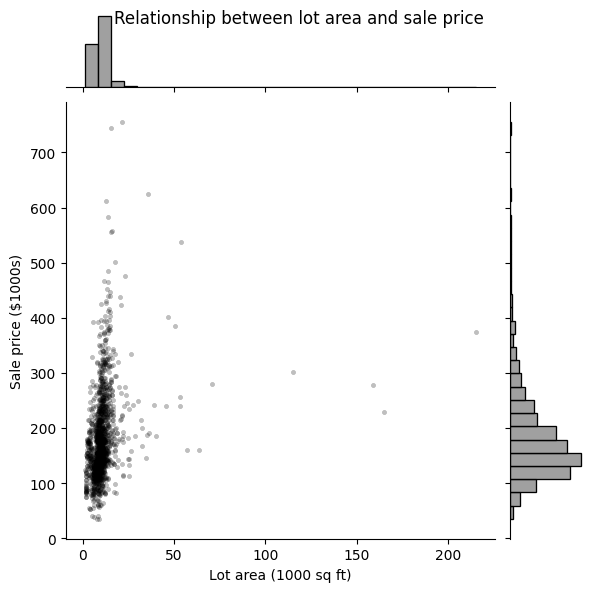

In [11]:
g = sns.jointplot(
    data=df,
    x='LotArea',
    y='SalePrice',
    kind='scatter',
    color='black', 
    joint_kws={'s':10, 'alpha':0.25, 'edgecolor':None},
    marginal_kws={'bins':30, 'color':'grey', 'edgecolor':'black'}
)

plt.suptitle('Relationship between lot area and sale price')
g.ax_joint.set_xlabel('Lot area (1000 sq ft)')
g.ax_joint.set_ylabel('Sale price ($1000s)')
g.ax_joint.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
g.ax_joint.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.show()

### 2.5. Normalized scatter plot

In [12]:
# Normalize sale price by lot area
df['PricePerLotSqFt'] = df['SalePrice'] / df['LotArea']

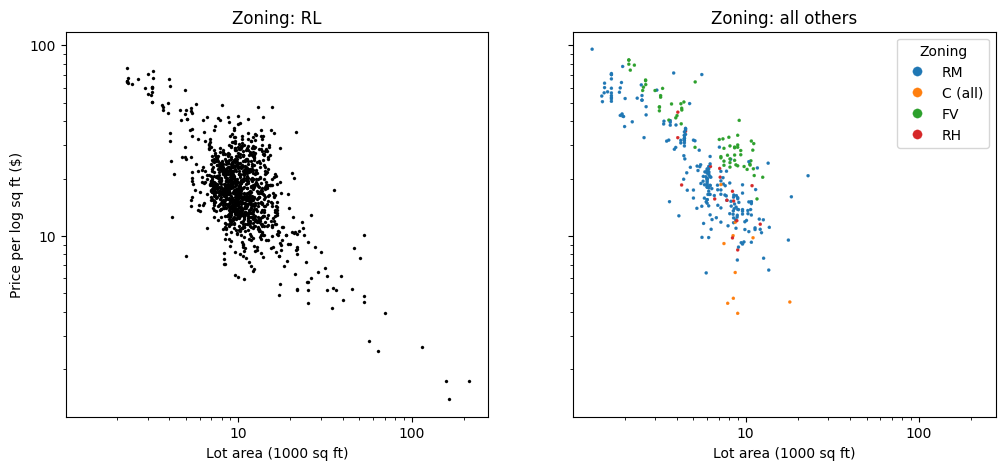

In [13]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))

subset = df[df['MSZoning'] == 'RL']

axs[0].set_title('Zoning: RL')
sns.scatterplot(data=subset, x='LotArea', y='PricePerLotSqFt', s=5, color='black', edgecolor=None, ax=axs[0])
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Lot area (1000 sq ft)')
axs[0].set_ylabel('Price per log sq ft ($)')
axs[0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:.0f}'))

subset = df[df['MSZoning'] != 'RL']

axs[1].set_title('Zoning: all others')
sns.scatterplot(data=subset, x='LotArea', y='PricePerLotSqFt', hue='MSZoning', s=5, edgecolor=None, ax=axs[1])
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Lot area (1000 sq ft)')
axs[1].set_ylabel('Price per log sq ft ($)')
axs[1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:.0f}'))
axs[1].legend(title='Zoning', markerscale=3)

plt.show()

### 2.6. Matplotlib contour plot

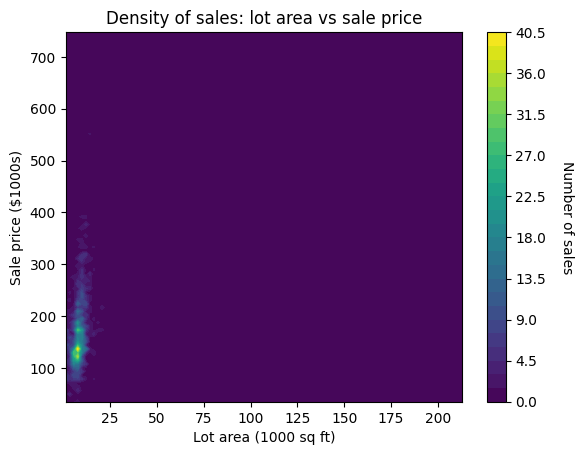

In [14]:
# Create grid for contour plot
x_bins = np.linspace(df['LotArea'].min(), df['LotArea'].max(),100)
y_bins = np.linspace(df['SalePrice'].min(), df['SalePrice'].max(), 100)

# Calculate 2D histogram
hist, x_edges, y_edges = np.histogram2d(df['LotArea'], df['SalePrice'], bins=[x_bins, y_bins])

# Create contour plot
plt.title('Density of sales: lot area vs sale price')

# Create filled contour plot with log-transformed data
contour = plt.contourf(
    x_edges[:-1], 
    y_edges[:-1], 
    hist.T, 
    levels=30, 
    cmap='viridis'
)

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Number of sales', rotation=270, labelpad=20)

plt.xlabel('Lot area (1000 sq ft)')
plt.ylabel('Sale price ($1000s)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))

plt.show()

### 2.7. Seaborn 2D KDE plot

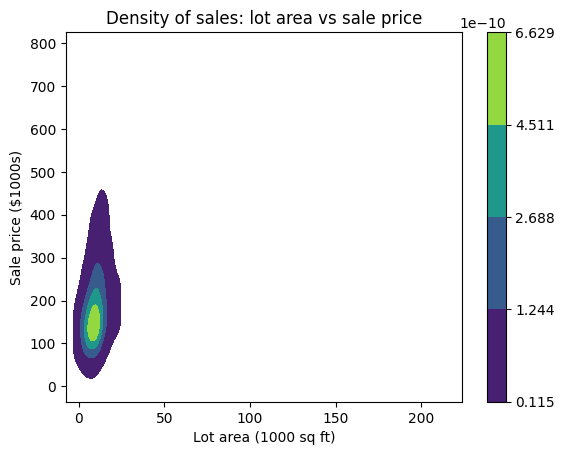

In [15]:
sns.kdeplot(data=df, x='LotArea', y='SalePrice', cmap='viridis', fill=True, cbar=True, levels=5)
plt.title('Density of sales: lot area vs sale price')
plt.xlabel('Lot area (1000 sq ft)')
plt.ylabel('Sale price ($1000s)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.show()

## 3. House count by neighborhood

### 3.1. Matplotlib bar plot

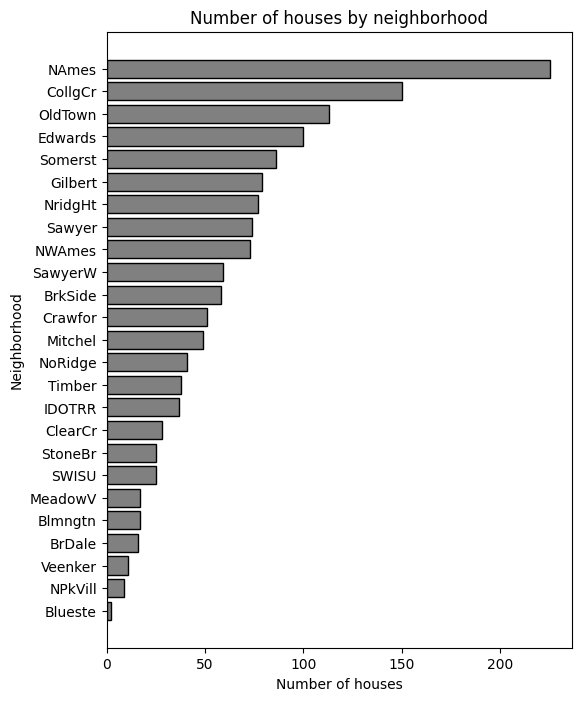

In [16]:
# Count houses by neighborhood
neighborhood_counts = df['Neighborhood'].value_counts().sort_values(ascending=True)

# Create bar chart
plt.figure(figsize=(6,8))
plt.title('Number of houses by neighborhood')
plt.barh(neighborhood_counts.index, neighborhood_counts.values, color='grey', edgecolor='black')
plt.xlabel('Number of houses')
plt.ylabel('Neighborhood')
plt.show()

### 3.2. Matplotlib cumulative histogram

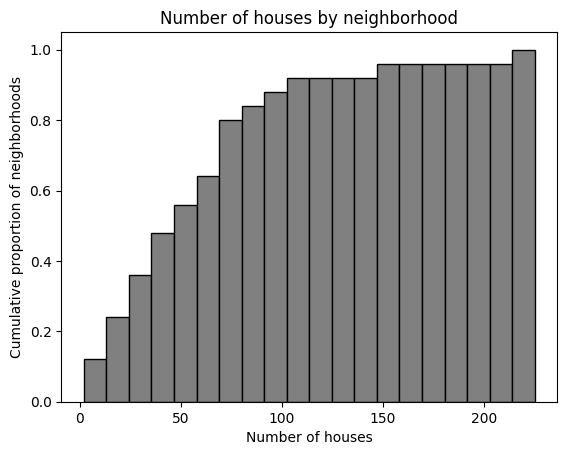

In [17]:
plt.title('Number of houses by neighborhood')
plt.hist(neighborhood_counts, cumulative=True, density=True, color='grey', edgecolor='black', bins=20)
plt.xlabel('Number of houses')
plt.ylabel('Cumulative proportion of neighborhoods')
plt.show()

### 3.3. Seaborn empirical cumulative distribution plot

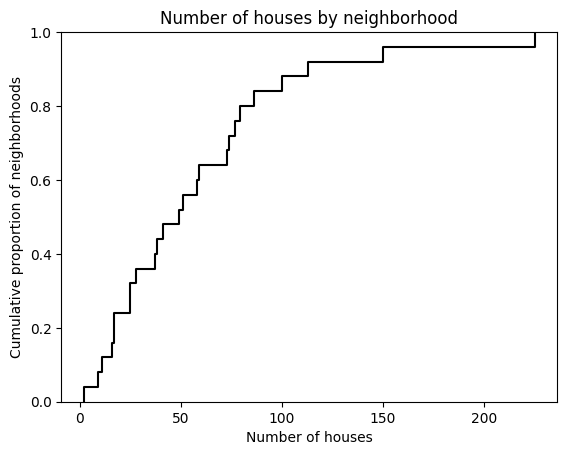

In [18]:
plt.title('Number of houses by neighborhood')
sns.ecdfplot(neighborhood_counts, color='black')
plt.xlabel('Number of houses')
plt.ylabel('Cumulative proportion of neighborhoods')
plt.show()

## 4. SalePrice distribution by neighborhood

### 4.1. Matplotlib boxplot

In [19]:
# Group sale prices by neighborhood
prices_by_neighborhood = df.groupby('Neighborhood')['SalePrice']

# Get list of neighborhoods ordered by median sale price
median_prices = prices_by_neighborhood.median()
sorted_neighborhoods = median_prices.sort_values(ascending=False).index.tolist()

# Convert GroupBy object to series of lists
prices_by_neighborhood = prices_by_neighborhood.apply(list)

# Sort neighborhoods by median sale price
prices_by_neighborhood = prices_by_neighborhood.reindex(sorted_neighborhoods)

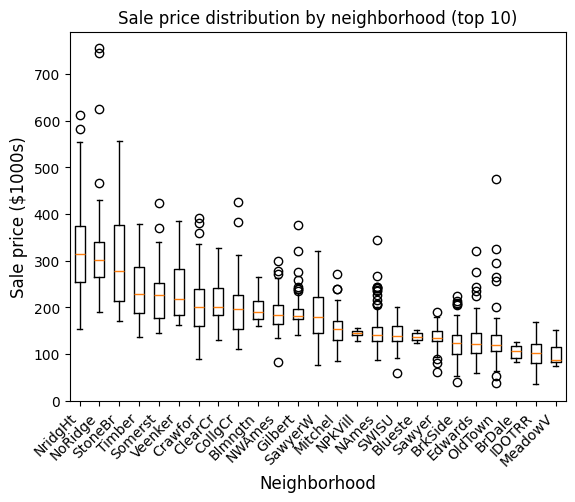

In [20]:
# Create box plot
plt.title('Sale price distribution by neighborhood (top 10)')
plt.boxplot(prices_by_neighborhood.values, tick_labels=prices_by_neighborhood.index)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Sale price ($1000s)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.xticks(rotation=45, ha='right')
plt.show()

### 4.2. Seaborn boxplot

In [21]:
# Create list of neighborhoods ordered by median sale price
neighborhoods = df['SalePrice'].groupby(df['Neighborhood']).median().sort_values(ascending=False).index.tolist()

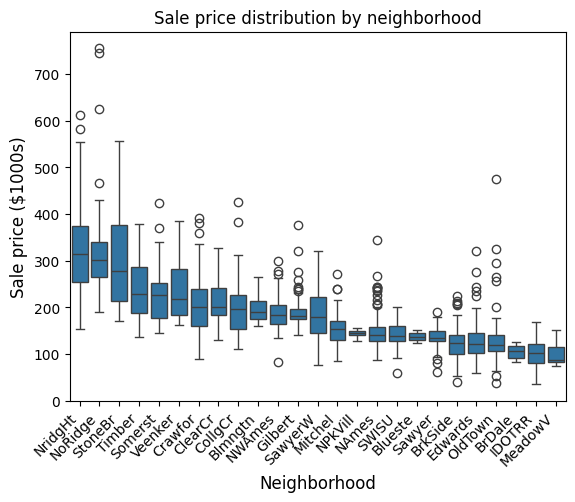

In [22]:
plt.title('Sale price distribution by neighborhood')
sns.boxplot(data=df, x='Neighborhood', y='SalePrice', order=neighborhoods)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Sale price ($1000s)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
plt.xticks(rotation=45, ha='right')
plt.show()

### 4.3. Matplotlib/Seaborn ridgeline chart

In [23]:
# Get mean sale price by neighborhood
mean_prices = df.groupby('Neighborhood')['SalePrice'].mean()

In [24]:
# Generate a color palette with colors for each neighborhood
pallet = sns.color_palette(palette='viridis', n_colors=len(mean_prices))

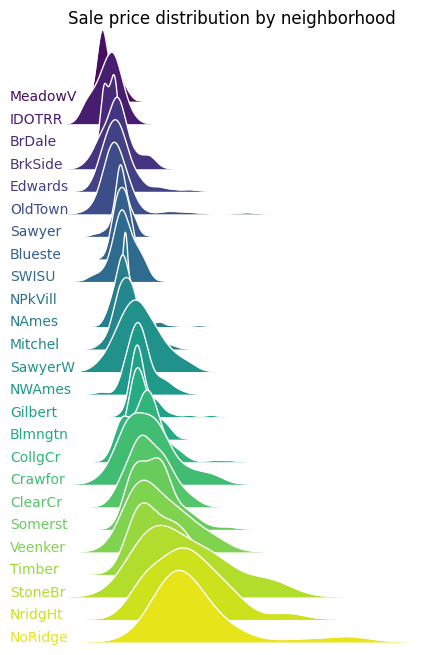

In [25]:
fig, ax = plt.subplots(ncols=1, nrows=len(mean_prices), sharex=True, figsize=(5,8))

fig.suptitle('Sale price distribution by neighborhood', y=0.9)

for i, neighborhood in enumerate(mean_prices.sort_values().index):

    subset = df[df['Neighborhood'] == neighborhood]

    sns.kdeplot(
        data=subset,
        x='SalePrice',
        fill=True,
        lw=0,
        alpha=1,
        color=pallet[i],
        ax=ax[i]
    )

    sns.kdeplot(
        data=subset,
        x='SalePrice',
        color='w',
        lw=1,
        ax=ax[i]
    )

    # Format x-axis for $1000s
    ax[i].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
    
    #ax[i].text(np.mean(subset['SalePrice'] + 3.5*np.std(subset['SalePrice'])), 0.000002, neighborhood, color=pallet[i])
    ax[i].text(np.min(df['SalePrice'] - 2e5), 0, neighborhood, color=pallet[i])
    ax[i].set_axis_off()


plt.subplots_adjust(hspace=-0.7)
plt.show()

## 5. Proportion of houses by MSZoning

### 5.1. Matplotlib pie chart

In [26]:
# Count houses by MSZoning
zoning_counts = df['MSZoning'].value_counts()

# Get percentages for each zoning classification
zoning_percentages = zoning_counts / zoning_counts.sum() * 100

# Format strings for legend labels with percentages
legend_labels = [f'{zoning} ({percentage:.1f}%)' for zoning, percentage in zip(zoning_counts.index, zoning_percentages)]

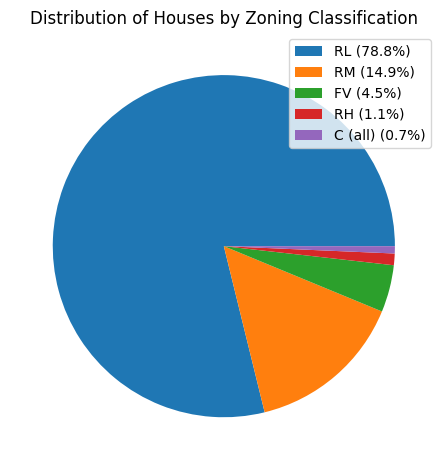

In [27]:
plt.title('Distribution of Houses by Zoning Classification')
plt.pie(zoning_counts.values)
plt.legend(labels=legend_labels, loc='upper right')
plt.tight_layout()
plt.show()

### 5.2. Pandas table

In [28]:
# Count houses by MSZoning
zoning_counts = df['MSZoning'].value_counts()

# Get percentages for each zoning classification
zoning_percentages = zoning_counts / zoning_counts.sum() * 100

# Format zoning percentages for display
zoning_percentages = [f'{zoning_percentage:.1f}%' for zoning_percentage in zoning_percentages]

# Create dataframe containing zoning counts and percentages
zoning_df = pd.DataFrame({
    'Houses': zoning_counts,
    'Percentage': zoning_percentages
})

zoning_df.head()

,Houses,Percentage
MSZoning,,
RL,1151,78.8%
RM,218,14.9%
FV,65,4.5%
RH,16,1.1%
C (all),10,0.7%


### 5.3. Seaborn bar plot

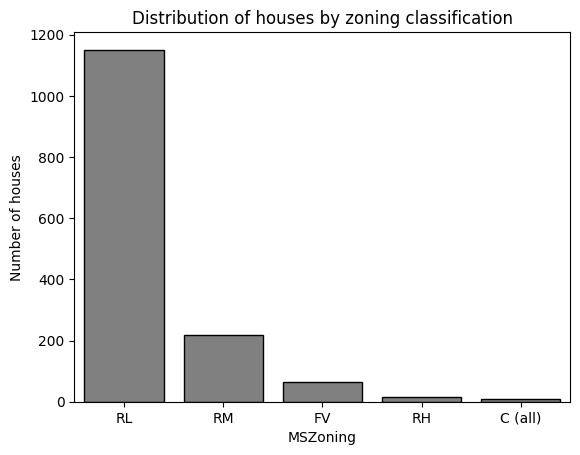

In [29]:
plt.title('Distribution of houses by zoning classification')
sns.barplot(x=zoning_counts.index, y=zoning_counts.values, color='grey', edgecolor='black')
plt.ylabel('Number of houses')
plt.show()

### 5.4. Matplotlib/pywaffle waffle chart

In [30]:
from pywaffle import Waffle

In [31]:
# Count houses by MSZoning
zoning_counts = df['MSZoning'].value_counts()

# Convert to dictionary for pywaffle
data = zoning_counts.to_dict()

In [32]:
# Generate color palette
colors = sns.color_palette(palette='twilight', n_colors=len(zoning_counts))

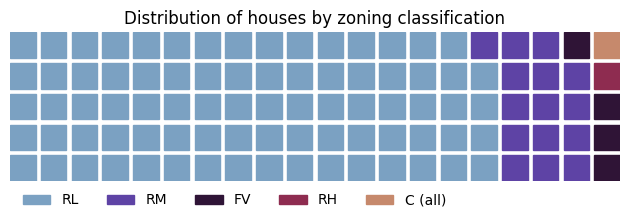

In [33]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=20,
    values=data,
    colors=colors,
    legend={'loc': 'upper left', 'ncol': len(data), 'bbox_to_anchor': (0, 0), 'framealpha': 0}
)

plt.title('Distribution of houses by zoning classification')
plt.show()

### 5.5. Matplotlib/squarify treemap

In [34]:
import squarify

In [35]:
# Generate color palette
colors = sns.color_palette(palette='tab10', n_colors=len(zoning_counts))

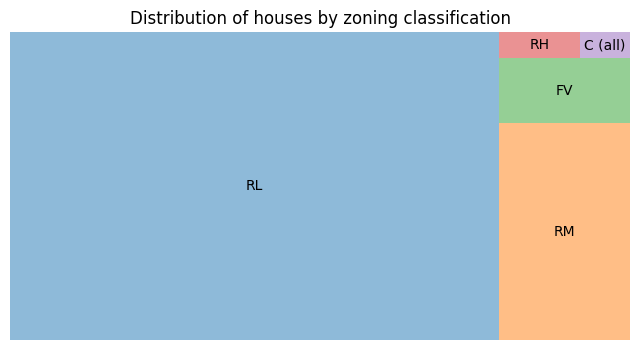

In [36]:
plt.figure(figsize=(8,4))
plt.title('Distribution of houses by zoning classification')
squarify.plot(sizes=zoning_counts.values, label=zoning_counts.index, color=colors, alpha=0.5)
plt.axis('off')
plt.show()

## 6. 3D scatter plot: LotArea, OverallQual, and SalePrice

### 6.1. Matplotlib

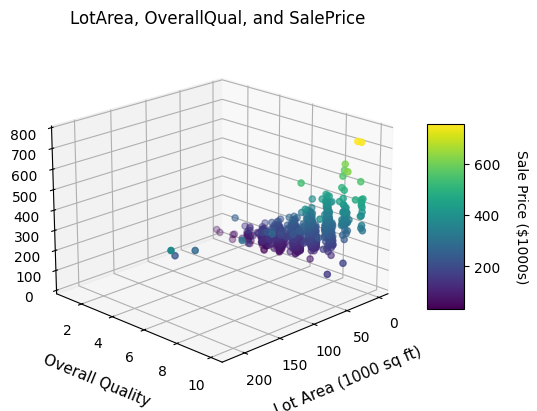

In [37]:
# Create 3D scatter plot
ax = plt.axes(projection='3d')

ax.set_title('LotArea, OverallQual, and SalePrice')

# Create scatter plot with color based on SalePrice
scatter = ax.scatter(
    df['LotArea'], 
    df['OverallQual'], 
    df['SalePrice'],
    c=df['SalePrice'], 
    cmap='viridis'
)

# Add labels and title
ax.set_xlabel('Lot Area (1000 sq ft)', fontsize=11, labelpad=10)
ax.set_ylabel('Overall Quality', fontsize=11, labelpad=10)
ax.set_zlabel('Sale Price ($1000s)', fontsize=11, labelpad=10)

# Format x-axis and z-axis to show values in 1000s
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
ax.zaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.0f}'))

# Add color bar with custom formatting
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5, format=FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
cbar.set_label('Sale Price ($1000s)', rotation=270, labelpad=20, fontsize=10)

# Adjust viewing angle
ax.view_init(elev=20, azim=45)

plt.show()

### 6.2. Plotly

In [38]:
import plotly.express as px

In [39]:
# Create a copy of the dataframe with scaled values for plotting
df_plot = df.copy()
df_plot['LotArea_k'] = df_plot['LotArea'] / 1000
df_plot['SalePrice_k'] = df_plot['SalePrice'] / 1000

# Create 3D scatter plot with Plotly
fig = px.scatter_3d(
    df_plot,
    x='LotArea_k',
    y='OverallQual',
    z='SalePrice_k',
    color='SalePrice_k',
    color_continuous_scale='viridis',
    labels={
        'LotArea_k': 'Lot Area (1000 sq ft)',
        'OverallQual': 'Overall Quality',
        'SalePrice_k': 'Sale Price ($1000s)'
    },
    title='LotArea, OverallQual, and SalePrice'
)

# Update layout for better viewing angle and colorbar
fig.update_layout(
    scene=dict(
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.3)
        )
    ),
    coloraxis_colorbar=dict(
        title='Sale Price<br>($1000s)'
    )
)

# Update hover template to show formatted values
fig.update_traces(
    hovertemplate='<b>Lot Area</b>: %{x:.1f}k sq ft<br>' +
                  '<b>Overall Quality</b>: %{y}<br>' +
                  '<b>Sale Price</b>: $%{z:.0f}k<br>' +
                  '<extra></extra>'
)

fig.show()